# Homework 2 - Vertical FL and Generative Modeling

Vertical federated learning (VFL) and generative modeling are two techniques for privacy preservation. The former enables collaborative training across vertically partitioned data. At the same time, the latter creates synthetic data as an alternative to using real sensitive data. In this assignment, you'll further explore some factors affecting model performance in VFL and how it can be bridged with generative modeling. 

# Instructions

Submit your assignment in ILIAS as only the Jupyter notebook with all relevant execution outputs and plots visible. Clearly indicate the relevant steps in your code, such as data preprocessing, model definition, training, etc. Partial grades can be given for incomplete problems provided the steps are clearly indicated.

## Exercise 1: Feature permutation in VFL (4 points)

Using the template code from [lab_vfl.ipynb](https://github.com/lydiaYchen/DDL25Spring/blob/main/lab/tutorial_2b/lab-vfl.ipynb), experiment with how shuffling the order of feature assignments to clients affects the performance. Use 4 clients with the default hyperparameters. Experiment with **3** random feature permutations and plot the training loss. Report whether/how shuffling features significantly affects the convergence rates and the reasoning behind it.

Scoring:
- _(1 point)_ Create 3 feature permutations with seeded Python/NumPy random functions and run them through the discriminative VFL model.
- _(1 point)_ Log the losses over time of the training runs and compile them into one plot.
- _(2 points)_ Describe what impact (if any) the permutations have on the loss and explain the observed pattern.

### Findings
One of the permutations resulted in a quite higher test accuracy than the rest. The first and third permutations had the feature split: <br>
- [['thal_1', 'restecg_2', 'ca_2', 'exang_1', 'cp_1', 'cp_2', 'thal_2'], ['ca_3', 'fbs_1', 'age', 'oldpeak', 'exang_0', 'sex_0', 'restecg_0'], ['fbs_0', 'ca_1', 'trestbps', 'chol', 'ca_4', 'thalach', 'ca_0'], ['thal_0', 'slope_0', 'thal_3', 'slope_2', 'cp_0', 'cp_3', 'restecg_1', 'slope_1', 'sex_1']] <br>with accuracy 86.76%
- [['ca_2', 'ca_0', 'chol', 'ca_3', 'exang_0', 'fbs_0', 'fbs_1'], ['slope_0', 'cp_1', 'trestbps', 'cp_2', 'restecg_1', 'oldpeak', 'sex_0'], ['thal_0', 'sex_1', 'thal_1', 'slope_1', 'cp_0', 'ca_1', 'cp_3'], ['restecg_2', 'ca_4', 'thal_3', 'age', 'thal_2', 'restecg_0', 'exang_1', 'thalach', 'slope_2']] <br>with accuracy 83.82%


while the second one had the feature split:
- [['ca_4', 'fbs_1', 'restecg_0', 'sex_1', 'cp_0', 'cp_1', 'cp_3'], ['slope_2', 'cp_2', 'thal_3', 'sex_0', 'ca_3', 'thal_0', 'ca_2'], ['ca_1', 'restecg_2', 'trestbps', 'fbs_0', 'slope_0', 'thalach', 'thal_2'], ['restecg_1', 'chol', 'thal_1', 'slope_1', 'exang_0', 'ca_0', 'exang_1', 'age', 'oldpeak']] <br>with accuracy 92.16%

If I would know the feature importances, then this might be a reason for the accuracy difference.

![Plot](Figure_1.png)

## Exercise 2: Scaling clients in VFL (5 points)

With the same template as above, experiment with how increasing the number of clients affects model performance. Explain the policy chosen for distributing features for different numbers of clients.

Scoring:
- _(1 point)_ Explain your scheme for partitioning the feature space under increasing number of clients.
- _(1 point)_ Implement the above explained partition mechanism for the requested client counts for the discriminative VFL model.
- _(1 point)_ Log the losses over time of the training runs and compile them into one plot.
- _(2 points)_ State what impact (if any) adding more clients has on the loss and explain the observed pattern.

### Findings
- Features are divided almost equally among clients by dividing the total number of features with the number of clients. Since this will not be an integer, number of features modulo clients is calculated and this number of first clients receive one more feature.
- Increasing the number of clients means each client works with a smaller feature set. This lead to a less informative representation, which in turn may causes the overall model to have higher training. This can be seen in the plot as the test error increases for a larger number of clients.
![Plot](Figure_2.png)

## Exercise 3: Bridging VFL and generative modeling (10 points)

In this exercise, you'll explore how synthetic data can be generated when the data is constrained to be vertically partitioned. Combine VFL with variational autoencoders (VAEs) using the architecture described as follows. Each client uses a local encoder, i.e., a multi-layer perceptron (MLP) to embed its sensitive features into latents. These latents are concatenated at the server and passed through a VAE. The VAE produces synthetic latents which are partitioned and then converted back into the actual input space using another local MLP (decoder) at each client. Show the model's training progress per epoch. 

Scoring:
- _(1 point)_ Preprocess the dataset and partition the features.
- _(2 points)_ Define the encoder and decoder MLPs held by each.
- _(2 points)_ Define the VAE used at the server over the concatenated feature representations from the clients.
- _(2 points)_ Define the VFL network that fits together the client networks and that of the server.
- _(1 point)_ Create and run the training loop of the complete model, printing the loss at every epoch.
- _(0.5 points)_ Q1: Consider, without implementing, an alternative scheme wherein the MLPs are first locally trained at the clients, followed by a separate training loop for the VAE at the server. How does this change what should be provided as input to the server?
- _(1.5 points)_ Q2: What are the pros and cons of the above mentioned alternative compared to the one implemented? Focus on the following aspects: privacy, communication costs, and performance.

### Findings
- Q1: In the alternative scheme, the server receives fixed, precomputed latent representations generated by the pre-trained and then frozen client MLPs, rather than dynamically updated latents computed during training.
- Q2: Pros:
        Privacy: Only sharing latent vectors, not raw data.
        Communication: Reduced need for frequent updates, only one set of latent representations is transmitted.
    Cons:
        Performance: It may get a misalignment between client and server models and therefore hurting the overall performance.
### For any questions regarding this assignment, send an email to a.shankar@tudelft.nl

## Exercise 1

Permutation 1 - Test accuracy: 86.76%
Permutation 1 - Test loss: 0.356
features: [['thal_1', 'restecg_2', 'ca_2', 'exang_1', 'cp_1', 'cp_2', 'thal_2'], ['ca_3', 'fbs_1', 'age', 'oldpeak', 'exang_0', 'sex_0', 'restecg_0'], ['fbs_0', 'ca_1', 'trestbps', 'chol', 'ca_4', 'thalach', 'ca_0'], ['thal_0', 'slope_0', 'thal_3', 'slope_2', 'cp_0', 'cp_3', 'restecg_1', 'slope_1', 'sex_1']]
Permutation 2 - Test accuracy: 92.16%
Permutation 2 - Test loss: 0.258
features: [['ca_4', 'fbs_1', 'restecg_0', 'sex_1', 'cp_0', 'cp_1', 'cp_3'], ['slope_2', 'cp_2', 'thal_3', 'sex_0', 'ca_3', 'thal_0', 'ca_2'], ['ca_1', 'restecg_2', 'trestbps', 'fbs_0', 'slope_0', 'thalach', 'thal_2'], ['restecg_1', 'chol', 'thal_1', 'slope_1', 'exang_0', 'ca_0', 'exang_1', 'age', 'oldpeak']]
Permutation 3 - Test accuracy: 83.82%
Permutation 3 - Test loss: 0.383
features: [['ca_2', 'ca_0', 'chol', 'ca_3', 'exang_0', 'fbs_0', 'fbs_1'], ['slope_0', 'cp_1', 'trestbps', 'cp_2', 'restecg_1', 'oldpeak', 'sex_0'], ['thal_0', 'sex_1',

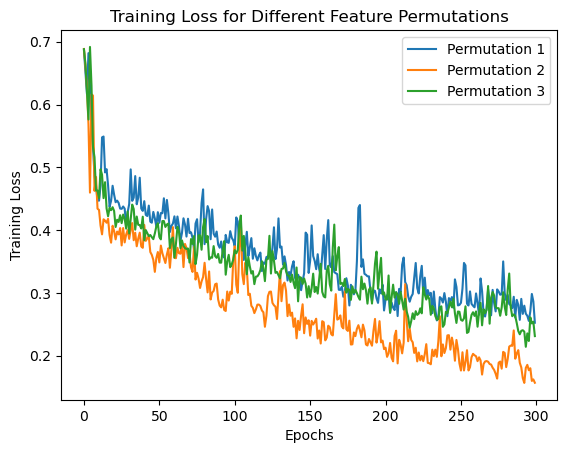

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


class BottomModel(nn.Module):
    def __init__(self, in_feat, out_feat):
        super(BottomModel, self).__init__()
        self.local_out_dim = out_feat
        self.fc1 = nn.Linear(in_feat, out_feat)
        self.fc2 = nn.Linear(out_feat, out_feat)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.act(self.fc1(x))
        return self.dropout(self.act(self.fc2(x)))


class TopModel(nn.Module):
    def __init__(self, local_models, n_outs):
        super(TopModel, self).__init__()
        self.in_size = sum([local_models[i].local_out_dim for i in range(len(local_models))])
        self.fc1 = nn.Linear(self.in_size, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 2)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        concat_outs = torch.cat(x, dim=1)
        x = self.act(self.fc1(concat_outs))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        return self.dropout(x)


class VFLNetwork(nn.Module):
    def __init__(self, local_models, n_outs):
        super(VFLNetwork, self).__init__()
        self.num_cli = None
        self.cli_features = None
        self.bottom_models = local_models
        self.top_model = TopModel(self.bottom_models, n_outs)
        self.optimizer = optim.AdamW(self.parameters())
        self.criterion = nn.CrossEntropyLoss()

    def train_with_settings(self, epochs, batch_sz, n_cli, cli_features, x, y, log_loss=None):
        self.num_cli = n_cli
        self.cli_features = cli_features
        x = x.astype('float32')
        y = y.astype('float32')
        x_train = [torch.tensor(x[feats].values) for feats in cli_features]
        y_train = torch.tensor(y.values)
        num_batches = len(x) // batch_sz if len(x) % batch_sz == 0 else len(x) // batch_sz + 1
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            total_loss = 0.0
            correct = 0.0
            total = 0.0
            for minibatch in range(num_batches):
                if minibatch == num_batches - 1:
                    x_minibatch = [x[int(minibatch * batch_sz):] for x in x_train]
                    y_minibatch = y_train[int(minibatch * batch_sz):]
                else:
                    x_minibatch = [x[int(minibatch * batch_sz):int((minibatch + 1) * batch_sz)] for x in x_train]
                    y_minibatch = y_train[int(minibatch * batch_sz):int((minibatch + 1) * batch_sz)]

                outs = self.forward(x_minibatch)
                pred = torch.argmax(outs, dim=1)
                actual = torch.argmax(y_minibatch, dim=1)
                correct += torch.sum((pred == actual))
                total += len(actual)
                loss = self.criterion(outs, y_minibatch)
                total_loss += loss
                loss.backward()
                self.optimizer.step()

            epoch_loss = total_loss.detach().numpy() / num_batches
            if log_loss:
                log_loss(epoch_loss)

    def forward(self, x):
        local_outs = [self.bottom_models[i](x[i]) for i in range(len(self.bottom_models))]
        return self.top_model(local_outs)

    def test(self, x, y):
        x = x.astype('float32')
        y = y.astype('float32')
        x_test = [torch.tensor(x[feats].values) for feats in self.cli_features]
        y_test = torch.tensor(y.values)
        with torch.no_grad():
            outs = self.forward(x_test)
            preds = torch.argmax(outs, dim=1)
            actual = torch.argmax(y_test, dim=1)
            accuracy = torch.sum((preds == actual)) / len(actual)
            loss = self.criterion(outs, y_test)
            return accuracy, loss


if __name__ == "__main__":

    def log_loss(epoch_loss):
            losses.append(epoch_loss)

    PERMUTATIONS = 3
    all_losses = []  # To store losses for each permutation
    torch.manual_seed(42)

    for i in range(PERMUTATIONS):
        np.random.seed(42 + i)
        df = pd.read_csv("tutorial_2a/heart.csv")
        categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
        numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
        df[numerical_cols] = MinMaxScaler().fit_transform(df[numerical_cols])
        encoded_df = pd.get_dummies(df, columns=categorical_cols)
        num_clients = 4
        X = encoded_df.drop("target", axis=1)
        Y = pd.get_dummies(encoded_df[['target']], columns=['target'])

        shuffled_features = np.random.permutation(X.columns)
        features_per_client = (num_clients - 1) * [(len(shuffled_features)) // num_clients]
        features_per_client.append(len(shuffled_features) - sum(features_per_client))
        features_per_client = np.array(features_per_client)
        client_feature_names = []
        start_index = 0
        for num_feats in features_per_client:
            client_feature_names.append(list(shuffled_features[start_index:start_index + num_feats]))
            start_index += num_feats

        outs_per_client = 2
        bottom_models = [BottomModel(len(in_feats), outs_per_client * len(in_feats)) for in_feats in client_feature_names]
        final_out_dims = 2
        Network = VFLNetwork(bottom_models, final_out_dims)

        EPOCHS = 300
        BATCH_SIZE = 64
        TRAIN_TEST_THRESH = 0.8
        X_train, X_test = X.loc[:int(TRAIN_TEST_THRESH * len(X))], X.loc[int(TRAIN_TEST_THRESH * len(X)) + 1:]
        Y_train, Y_test = Y.loc[:int(TRAIN_TEST_THRESH * len(Y))], Y.loc[int(TRAIN_TEST_THRESH * len(Y)) + 1:]

        losses = []
        Network.train_with_settings(EPOCHS, BATCH_SIZE, num_clients, client_feature_names, X_train, Y_train, log_loss)
        all_losses.append(losses)

        accuracy, loss = Network.test(X_test, Y_test)
        print(f"Permutation {i+1} - Test accuracy: {accuracy * 100:.2f}%")
        print(f"Permutation {i+1} - Test loss: {loss:.3f}")
        print(f"features: {client_feature_names}")

    for i, losses in enumerate(all_losses):
        plt.plot(losses, label=f'Permutation {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss for Different Feature Permutations')
    plt.legend()
    plt.show()

## Exercise 2

Experimenting with 2 clients...
2 Clients - Test accuracy: 90.20%
2 Clients - Test loss: 0.300
Features per client: [['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1'], ['restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']]
Experimenting with 4 clients...
4 Clients - Test accuracy: 84.31%
4 Clients - Test loss: 0.455
Features per client: [['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0'], ['cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2'], ['exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1'], ['ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']]
Experimenting with 6 clients...
6 Clients - Test accuracy: 83.33%
6 Clients - Test loss: 0.448
Features per client: [['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], ['se

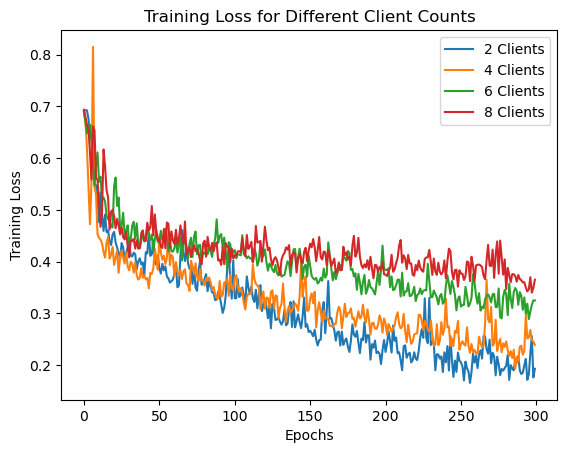

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


class BottomModel(nn.Module):
    def __init__(self, in_feat, out_feat):
        super(BottomModel, self).__init__()
        self.local_out_dim = out_feat
        self.fc1 = nn.Linear(in_feat, out_feat)
        self.fc2 = nn.Linear(out_feat, out_feat)
        self.act = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.act(self.fc1(x))
        return self.dropout(self.act(self.fc2(x)))


class TopModel(nn.Module):
    def __init__(self, local_models, n_outs):
        super(TopModel, self).__init__()
        self.in_size = sum([local_models[i].local_out_dim for i in range(len(local_models))])
        self.fc1 = nn.Linear(self.in_size, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 2)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        concat_outs = torch.cat(x, dim=1)
        x = self.act(self.fc1(concat_outs))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        return self.dropout(x)


class VFLNetwork(nn.Module):
    def __init__(self, local_models, n_outs):
        super(VFLNetwork, self).__init__()
        self.num_cli = None
        self.cli_features = None
        self.bottom_models = local_models
        self.top_model = TopModel(self.bottom_models, n_outs)
        self.optimizer = optim.AdamW(self.parameters())
        self.criterion = nn.CrossEntropyLoss()

    def train_with_settings(self, epochs, batch_sz, n_cli, cli_features, x, y, log_loss=None):
        self.num_cli = n_cli
        self.cli_features = cli_features
        x = x.astype('float32')
        y = y.astype('float32')
        x_train = [torch.tensor(x[feats].values) for feats in cli_features]
        y_train = torch.tensor(y.values)
        num_batches = len(x) // batch_sz if len(x) % batch_sz == 0 else len(x) // batch_sz + 1
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            total_loss = 0.0
            correct = 0.0
            total = 0.0
            for minibatch in range(num_batches):
                if minibatch == num_batches - 1:
                    x_minibatch = [x[int(minibatch * batch_sz):] for x in x_train]
                    y_minibatch = y_train[int(minibatch * batch_sz):]
                else:
                    x_minibatch = [x[int(minibatch * batch_sz):int((minibatch + 1) * batch_sz)] for x in x_train]
                    y_minibatch = y_train[int(minibatch * batch_sz):int((minibatch + 1) * batch_sz)]

                outs = self.forward(x_minibatch)
                pred = torch.argmax(outs, dim=1)
                actual = torch.argmax(y_minibatch, dim=1)
                correct += torch.sum((pred == actual))
                total += len(actual)
                loss = self.criterion(outs, y_minibatch)
                total_loss += loss
                loss.backward()
                self.optimizer.step()

            epoch_loss = total_loss.detach().numpy() / num_batches
            if log_loss:
                log_loss(epoch_loss)

    def forward(self, x):
        local_outs = [self.bottom_models[i](x[i]) for i in range(len(self.bottom_models))]
        return self.top_model(local_outs)

    def test(self, x, y):
        x = x.astype('float32')
        y = y.astype('float32')
        x_test = [torch.tensor(x[feats].values) for feats in self.cli_features]
        y_test = torch.tensor(y.values)
        with torch.no_grad():
            outs = self.forward(x_test)
            preds = torch.argmax(outs, dim=1)
            actual = torch.argmax(y_test, dim=1)
            accuracy = torch.sum((preds == actual)) / len(actual)
            loss = self.criterion(outs, y_test)
            return accuracy, loss


if __name__ == "__main__":

    def log_loss(epoch_loss):
        losses.append(epoch_loss)

    CLIENT_COUNTS = [2, 4, 6, 8]  # Experiment with different numbers of clients
    all_losses = {n_clients: [] for n_clients in CLIENT_COUNTS}  # Store losses for each client count
    torch.manual_seed(42)

    for n_clients in CLIENT_COUNTS:
        print(f"Experimenting with {n_clients} clients...")
        np.random.seed(42)
        df = pd.read_csv("tutorial_2a/heart.csv")
        categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
        numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
        df[numerical_cols] = MinMaxScaler().fit_transform(df[numerical_cols])  
        encoded_df = pd.get_dummies(df, columns=categorical_cols)  
        X = encoded_df.drop("target", axis=1)
        Y = pd.get_dummies(encoded_df[['target']], columns=['target'])

        total_features = list(X.columns)
        encoded_df_feature_names = total_features.copy()

        base_features_per_client = len(total_features) // n_clients
        extra_features = len(total_features) % n_clients
        
        features_per_client = [base_features_per_client + (1 if i < extra_features else 0) for i in range(n_clients)]
        client_feature_names = []
        start_index = 0

        for num_feats in features_per_client:
            feat_names = total_features[start_index:start_index + num_feats]
            client_feature_names.append(feat_names)
            start_index += num_feats

        for i in range(len(client_feature_names)):
            updated_names = []
            for column_name in client_feature_names[i]:
                if column_name not in categorical_cols:
                    updated_names.append(column_name)
                else:
                    for name in encoded_df_feature_names:
                        if '_' in name and column_name in name:
                            updated_names.append(name)
            client_feature_names[i] = updated_names

        outs_per_client = 2
        bottom_models = [BottomModel(len(in_feats), outs_per_client * len(in_feats)) for in_feats in client_feature_names]
        final_out_dims = 2
        Network = VFLNetwork(bottom_models, final_out_dims)

        EPOCHS = 300
        BATCH_SIZE = 64
        TRAIN_TEST_THRESH = 0.8
        X_train = X.loc[:int(TRAIN_TEST_THRESH * len(X))]
        X_test = X.loc[int(TRAIN_TEST_THRESH * len(X)) + 1:]
        Y_train = Y.loc[:int(TRAIN_TEST_THRESH * len(Y))]
        Y_test = Y.loc[int(TRAIN_TEST_THRESH * len(Y)) + 1:]

        losses = []
        Network.train_with_settings(EPOCHS, BATCH_SIZE, n_clients, client_feature_names, X_train, Y_train, log_loss)
        all_losses[n_clients] = losses

        accuracy, loss = Network.test(X_test, Y_test)
        print(f"{n_clients} Clients - Test accuracy: {accuracy * 100:.2f}%")
        print(f"{n_clients} Clients - Test loss: {loss:.3f}")
        print(f"Features per client: {client_feature_names}")

    for n_clients, losses in all_losses.items():
        plt.plot(losses, label=f'{n_clients} Clients')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss for Different Client Counts')
    plt.legend()
    plt.show()

## Exercise 3

Epoch 1, Loss: 114117.9297
Epoch 2, Loss: 113356.1875
Epoch 3, Loss: 111888.4453
Epoch 4, Loss: 111139.6484
Epoch 5, Loss: 110537.3281
Epoch 6, Loss: 108939.9844
Epoch 7, Loss: 107641.8672
Epoch 8, Loss: 106487.4688
Epoch 9, Loss: 106641.9219
Epoch 10, Loss: 105491.2266
Epoch 11, Loss: 104787.3672
Epoch 12, Loss: 104205.1016
Epoch 13, Loss: 102712.4688
Epoch 14, Loss: 102187.5469
Epoch 15, Loss: 101416.3672
Epoch 16, Loss: 99400.8359
Epoch 17, Loss: 99728.2188
Epoch 18, Loss: 98201.8203
Epoch 19, Loss: 97916.2266
Epoch 20, Loss: 96112.7812
Epoch 21, Loss: 95519.7266
Epoch 22, Loss: 94458.7422
Epoch 23, Loss: 93016.9141
Epoch 24, Loss: 92858.3984
Epoch 25, Loss: 91364.1562
Epoch 26, Loss: 91165.3906
Epoch 27, Loss: 89696.3828
Epoch 28, Loss: 88716.5781
Epoch 29, Loss: 87789.0703
Epoch 30, Loss: 86358.1328
Epoch 31, Loss: 85948.7578
Epoch 32, Loss: 84811.2031
Epoch 33, Loss: 83987.0312
Epoch 34, Loss: 82727.7031
Epoch 35, Loss: 82016.2266
Epoch 36, Loss: 80639.0469
Epoch 37, Loss: 79756.

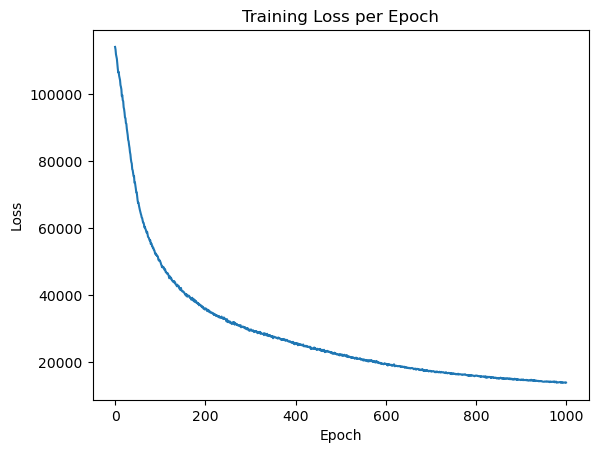

In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class ClientEncoder(nn.Module):
    """
    First part of the centralized autoencoder, maping a client's input to a latent representation.
    """
    def __init__(self, input_dim, latent_dim):
        super(ClientEncoder, self).__init__()
        self.linear1 = nn.Linear(input_dim, 48)  
        self.bn1 = nn.BatchNorm1d(48)
        self.linear2 = nn.Linear(48, 32)           
        self.bn2 = nn.BatchNorm1d(32)
        self.linear3 = nn.Linear(32, 32)           
        self.bn3 = nn.BatchNorm1d(32)
        self.fc = nn.Linear(32, latent_dim)
        self.bn_fc = nn.BatchNorm1d(latent_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.bn1(self.linear1(x)))
        x = self.relu(self.bn2(self.linear2(x)))
        x = self.relu(self.bn3(self.linear3(x)))
        x = self.relu(self.bn_fc(self.fc(x)))
        return x

class ClientDecoder(nn.Module):
    """
    Converts synthetic latent back to the local input space.
    """
    def __init__(self, latent_dim, output_dim):
        super(ClientDecoder, self).__init__()
        self.linear1 = nn.Linear(latent_dim, latent_dim)
        self.bn1 = nn.BatchNorm1d(latent_dim)
        self.linear2 = nn.Linear(latent_dim, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.linear3 = nn.Linear(32, 48)
        self.bn3 = nn.BatchNorm1d(48)
        self.linear4 = nn.Linear(48, output_dim)
        self.bn4 = nn.BatchNorm1d(output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, z):
        z = self.relu(self.bn1(self.linear1(z)))
        z = self.relu(self.bn2(self.linear2(z)))
        z = self.relu(self.bn3(self.linear3(z)))
        z = self.bn4(self.linear4(z))
        return z

class ServerVAE(nn.Module):
    """
    VAE server operating on the concatenated client latents.
    """
    def __init__(self, D_in, H=48, H2=32, latent_dim=16):
        super(ServerVAE, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.lin_bn1 = nn.BatchNorm1d(H)
        self.linear2 = nn.Linear(H, H2)
        self.lin_bn2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H2)
        self.lin_bn3 = nn.BatchNorm1d(H2)
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)
        self.linear4 = nn.Linear(H2, H2)
        self.lin_bn4 = nn.BatchNorm1d(H2)
        self.linear5 = nn.Linear(H2, H)
        self.lin_bn5 = nn.BatchNorm1d(H)
        self.linear6 = nn.Linear(H, D_in)
        self.lin_bn6 = nn.BatchNorm1d(D_in)
        self.relu = nn.ReLU()
        
    def encode(self, x):
        x = self.relu(self.lin_bn1(self.linear1(x)))
        x = self.relu(self.lin_bn2(self.linear2(x)))
        x = self.relu(self.lin_bn3(self.linear3(x)))
        x = self.relu(self.bn1(self.fc1(x)))
        mu = self.fc21(x)
        logvar = self.fc22(x)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mu + eps * std
        else:
            return mu
        
    def decode(self, z):
        z = self.relu(self.fc_bn3(self.fc3(z)))
        z = self.relu(self.fc_bn4(self.fc4(z)))
        z = self.relu(self.lin_bn4(self.linear4(z)))
        z = self.relu(self.lin_bn5(self.linear5(z)))
        z = self.lin_bn6(self.linear6(z))
        return z
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

class VFLVAE(nn.Module):
    """
    Combination of client encoders, server VAE, and client decoders.
    """
    def __init__(self, client_encoders, server_vae, client_decoders, client_latent_dim):
        super(VFLVAE, self).__init__()
        self.client_encoders = nn.ModuleList(client_encoders)
        self.server_vae = server_vae
        self.client_decoders = nn.ModuleList(client_decoders)
        self.client_latent_dim = client_latent_dim
        
    def forward(self, x_clients):
        client_latents = [enc(x) for enc, x in zip(self.client_encoders, x_clients)]
        concat_latent = torch.cat(client_latents, dim=1)
        recon_concat, mu, logvar = self.server_vae(concat_latent)
        reconstructed_clients = []
        start = 0
        for dec in self.client_decoders:
            end = start + self.client_latent_dim
            latent_part = recon_concat[:, start:end]
            x_recon = dec(latent_part)
            reconstructed_clients.append(x_recon)
            start = end
        return reconstructed_clients, mu, logvar, concat_latent, recon_concat

def combined_loss(x_clients, recon_clients, concat_latent, recon_concat, mu, logvar):
    mse = nn.MSELoss(reduction='sum')
    client_loss = 0.0
    for orig, recon in zip(x_clients, recon_clients):
        client_loss += mse(recon, orig)
    latent_loss = mse(recon_concat, concat_latent)
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return client_loss + latent_loss + kl_loss

if __name__ == "__main__":
    df = pd.read_csv(Path("tutorial_2a/heart.csv"))
    categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    df = pd.get_dummies(df, columns=categorical)
    X = df.drop("target", axis=1)
    y = df["target"]
    data = pd.concat([X, y], axis=1)
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
    
    total_features = list(data_scaled.columns)
    D_in = len(total_features)
    n_clients = 4
    base = D_in // n_clients
    extra = D_in % n_clients
    client_feature_counts = [base + (1 if i < extra else 0) for i in range(n_clients)]
    
    client_feature_names = []
    start = 0
    for count in client_feature_counts:
        client_feature_names.append(total_features[start:start+count])
        start += count
    
    x_clients = []
    for feats in client_feature_names:
        x_clients.append(torch.tensor(data_scaled[feats].values).float())
    
    client_latent_dim = 8
    client_encoders = []
    client_decoders = []
    for feats in client_feature_names:
        input_dim = len(feats)
        client_encoders.append(ClientEncoder(input_dim, client_latent_dim))
        client_decoders.append(ClientDecoder(client_latent_dim, input_dim))
    
    server_input_dim = n_clients * client_latent_dim
    server_vae = ServerVAE(D_in=server_input_dim, H=48, H2=32, latent_dim=16)
    
    model = VFLVAE(client_encoders, server_vae, client_decoders, client_latent_dim)
    
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    epochs = 1000
    losses = []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        recon_clients, mu, logvar, concat_latent, recon_concat = model(x_clients)
        loss = combined_loss(x_clients, recon_clients, concat_latent, recon_concat, mu, logvar)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
    
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss per Epoch")
    plt.show()